<a href="https://colab.research.google.com/github/dlafrc/SummerCourse-3_Course-2B-Python-for-Data-Analysis/blob/main/Course_2B_Python_for_Data_Analysis_Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Course 2B: Python for Data Analysis**
Group 3:
*   Muhammad Al-Zukarnaim Bin Sapti (Universiti Teknologi Mara (UiTM))
*   Rozaina Binti Zainul Rashid (Universiti Teknologi Malaysia)
*   Della Rachmatika Noer Intanty (Universitas Pendidikan Indonesia)
*   Dk Siti Nurul Mashitah binti Pg Mohd Sahar (Universiti Islam Sultan Sharif Ali (UNISSA))
*   Azubuike Fortune Okpala (University of Cyberjaya)

In [3]:
#Import pyhton libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving orderdataset.xlsx to orderdataset.xlsx


In [7]:
#read excel file
df = pd.read_excel("orderdataset.xlsx")

In [8]:
#reading list of the data
df.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,2016-10-03,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-03,e-wallet,fashion,500.0


**1. Check and prepare data to clean and handling missing values and ensuring consistency.**

In [9]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 order_id                  0
quantity                  0
product_id                0
price                     0
seller_id                 0
freight_value             0
customer_id               0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64


In [10]:
# Filling missing values in the column 'product_weight_gram' with 0
df['product_weight_gram'] = df['product_weight_gram'].fillna(0)

In [11]:
# Checking again if there are any missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 order_id                 0
quantity                 0
product_id               0
price                    0
seller_id                0
freight_value            0
customer_id              0
order_status             0
purchase_date            0
payment_type             0
product_category_name    0
product_weight_gram      0
dtype: int64


**2. Use Statistical methods to identify significant correlation/comparative/distribution/trending between variables from the data**

In [12]:
# Comparing the quantity of each product category
comparison = df.groupby('product_category_name')['quantity'].sum()
print("Comparison of Quantity by Product Category:\n", comparison)

Comparison of Quantity by Product Category:
 product_category_name
automotive     7504
beauty         7452
electronics    7537
fashion        7486
gadget         7393
sports         7411
toys           7705
utilities      7385
Name: quantity, dtype: int64


**3. Summaries the data with statistical analysis: Use descriptive statistics with aggregation function (i.e sum, count, average, min, max) for searching meaningful information such as: top product sales, total amount, average amount, etc**

In [21]:
#Using Pandas Groupby method

#To see top sales of product
df_product = df.groupby('product_id')['quantity'].sum()
top_products = df_product.nlargest(3)

# Total amount (sum of price)
total_amount = df['price'].sum()

# Average amount (mean of price)
average_amount = df['price'].mean()

# Minimum and Maximum prices
min_price = df['price'].min()
max_price = df['price'].max()

# Count unique order IDs
total_orders = df['order_id'].nunique()  # Count unique order IDs


print("Summary Statistical Analysis on Dataset")
print()
print("Top Products by Sales:")
print(top_products)
print()
print(f"Total Sales Amount: RM{total_amount:.2f}")
print()
print(f"Average Amount: RM{average_amount:.2f}")
print()
print(f"Minimum Price: RM{min_price:.2f}")
print(f"Maximum Price: RM{max_price:.2f}")
print()
print(f"Total Number of Orders: {total_orders}")

Summary Statistical Analysis on Dataset

Top Products by Sales:
product_id
422879e10f46682990de24d770e7f83d    464
99a4788cb24856965c36a24e339b6058    406
389d119b48cf3043d311335e499d9c6b    285
Name: quantity, dtype: int64

Total Sales Amount: RM130386588000.00

Average Amount: RM2607783.92

Minimum Price: RM200000.00
Maximum Price: RM5000000.00

Total Number of Orders: 42694


In [13]:
##Top Product Sales
# Displaying Top Product Sales
top_product_sales = df.groupby('product_id')['quantity'].sum().idxmax()
print("Top Product ID:", top_product_sales)

# Displaying Total quantity sold of top product
top_product_quantity = df.groupby('product_id')['quantity'].sum().max()
print("Top Product Sales (Quantity):", top_product_quantity)

Top Product ID: 422879e10f46682990de24d770e7f83d
Top Product Sales (Quantity): 464


In [22]:
##Total Amount
# Filter


In [ ]:
##Average Amount

**4. Visualize the data with charts and graphs to see patterns and relationships (min.3 graph)**

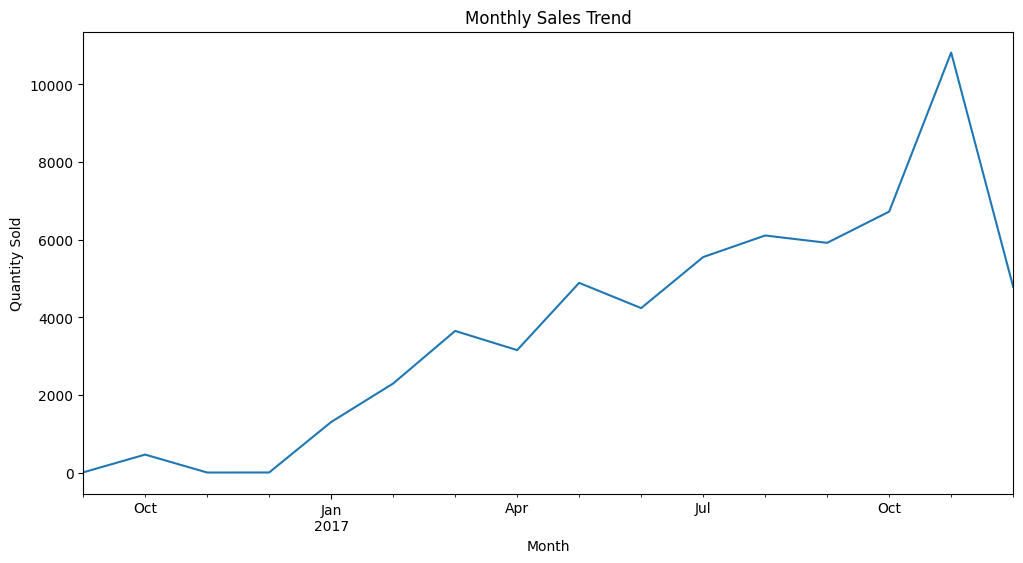

In [14]:
##1
# Visualizing sales trends monthly
monthly_sales = df.resample('M', on='purchase_date')['quantity'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.show()

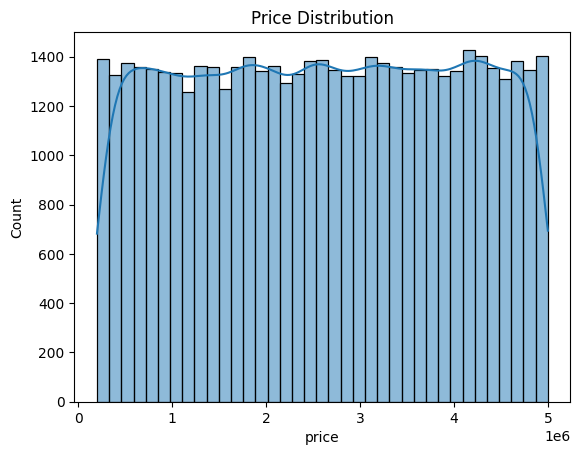

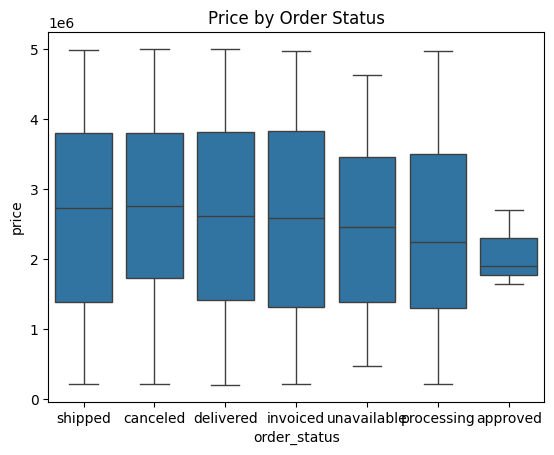

In [15]:
##2
# Distribution of prices
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

# Boxplot of prices by order status
sns.boxplot(x='order_status', y='price', data=df)
plt.title('Price by Order Status')
plt.show()

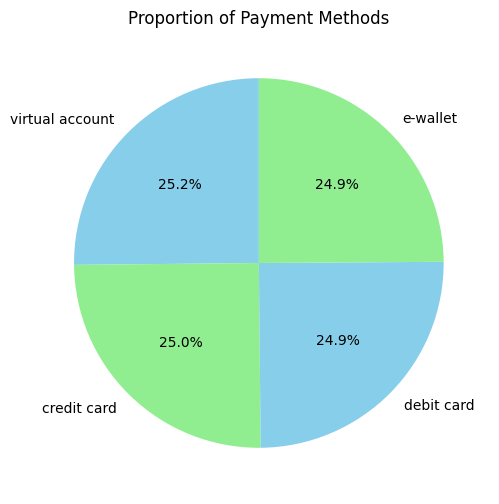

In [19]:
##3
# Displaying Proportion of Payment Methods
payment_counts = df['payment_type'].value_counts()
payment_proportions = payment_counts / payment_counts.sum()

# Creating a pie chart
plt.figure(figsize=(8, 6))
payment_proportions.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Payment Methods')
plt.ylabel('')  # Remove y label
plt.show()
